In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(
    "/Users/sagarguttal/Work/Natural-Language-Processing/Datasets/sentiment_train",
    sep="\t",
    header=0
)
pd.set_option("max_colwidth", 800)
data


,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain."
6916,0,Ok brokeback mountain is such a horrible movie.


In [3]:
data[data['sentiment']==1] # Only Positive sentiments, 

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
3938,1,man i loved brokeback mountain!
3939,1,dudeee i LOVED brokeback mountain!!!!
3940,1,I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:
3941,1,"Anyway, thats why I love "" Brokeback Mountain."


In [4]:
data[data['sentiment']==0] # Only Negative sentiments, 

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain."
6916,0,Ok brokeback mountain is such a horrible movie.


## EXploration of datasets

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


2975.0
3943.0


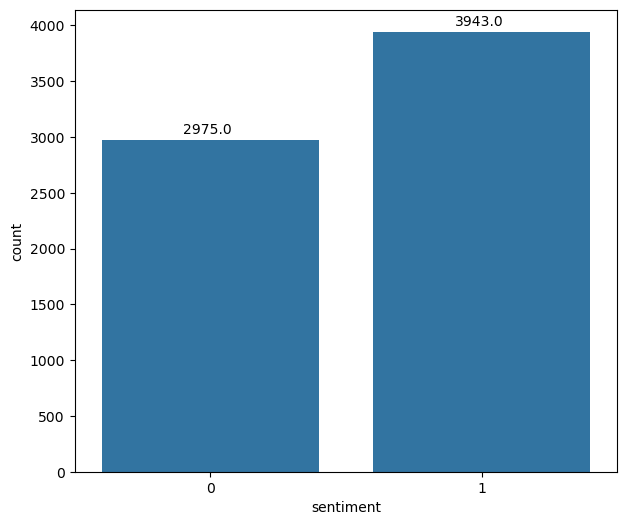

In [6]:
plt.figure( figsize=(7,6))
ax = sns.countplot(x='sentiment', data=data)
for p in ax.patches:
    print(p.get_height())
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+50))

### Text preprocessing
#### Bag of word method

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
feature_vectors = cv.fit(data['text'])
features = cv.get_feature_names_out()
print("all features", features)
print("Feature (vacabulary)len", len(features))

all features ['00' '007' '10' ... 'zach' 'zen' 'µª']
Feature (vacabulary)len 2132


In [8]:
train_df_features = cv.transform(data['text'])
train_df_features ## Stores in the sparse metrics - Sparse matric means
""""
What are Sparse Metrics?

Sparse metrics are evaluation measures used when data is sparse, meaning:

Most values are zeros

Positive/important events are rare

Classes are highly imbalanced
"""

'"\nWhat are Sparse Metrics?\n\nSparse metrics are evaluation measures used when data is sparse, meaning:\n\nMost values are zeros\n\nPositive/important events are rare\n\nClasses are highly imbalanced\n'

In [9]:
train_df_features.count_nonzero() ## Totally no - seros are 

65398

In [10]:
## Percentage of no - zero values

(65398 / (6918*2132)) * 100 

0.4434010415225908

In [11]:
train_df_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
sparse_metrics_dataframe = pd.DataFrame(train_df_features.todense(), columns=features)
sparse_metrics_dataframe.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sparse_metrics_dataframe.iloc[0:3, 150:159]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward,axes,azkaban
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0


In [14]:
data.head(3)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.


### Remove Low frequency Words

In [15]:
feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_counts.shape

(2132,)

In [16]:
feature__count_df = pd.DataFrame(dict(features=features, counts=feature_counts))
feature__count_df

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1
...,...,...
2127,yuck,1
2128,yuh,1
2129,zach,1
2130,zen,80


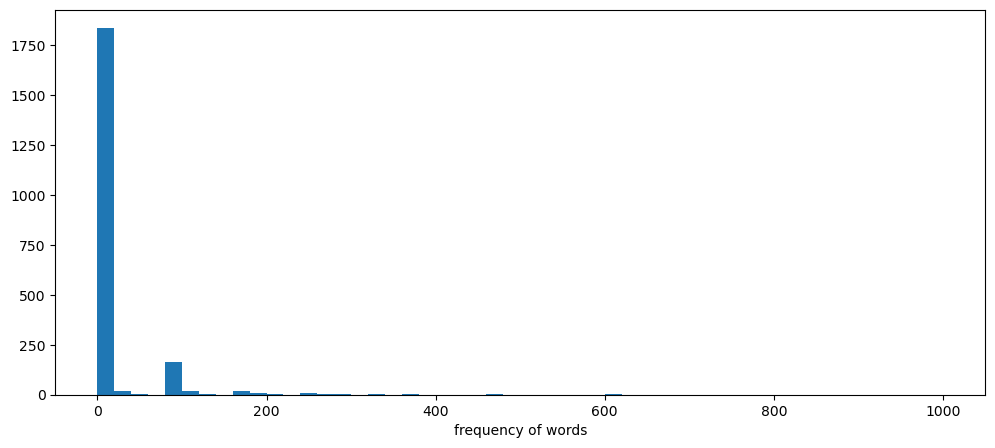

In [17]:
plt.figure(figsize=(12,5))
plt.hist(feature__count_df['counts'], bins=50, range=(0, 1000))
plt.xlabel("frequency of words")
plt.show()

In [18]:
feature__count_df[feature__count_df['counts']==1]

,features,counts
0,00,1
1,007,1
3,10pm,1
4,12,1
5,16,1
...,...,...
2125,younger,1
2127,yuck,1
2128,yuh,1
2129,zach,1


In [19]:
cv = CountVectorizer(max_features=1000)
feature_vectors = cv.fit(data['text'])
features = cv.get_feature_names_out()
print("Feature (vacabulary)len", len(features))

train_df_features = cv.transform(data['text'])
train_df_features ## Stores in the sparse metrics - Sparse matric means

feature_counts = np.sum(train_df_features.toarray(), axis=0)

feature__count_df = pd.DataFrame(dict(features=features, counts=feature_counts))

feature__count_df.sort_values('counts', ascending=False)


Feature (vacabulary)len 1000


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
...,...,...
610,park,1
674,posts,1
613,partyin,1
616,pastings,1


## Removing the stop words

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

In [21]:
my_stop_words = stop_words.union(['harry', 'potter', 'code', 'vinci', 'moutain', 'movie', 'movies', 'da'])


In [22]:
cv = CountVectorizer(max_features=1000, stop_words=list(my_stop_words))
feature_vectors = cv.fit(data['text'])
features = cv.get_feature_names_out()
print("Feature (vacabulary)len", len(features))

train_df_features = cv.transform(data['text'])
train_df_features ## Stores in the sparse metrics - Sparse matric means

feature_counts = np.sum(train_df_features.toarray(), axis=0)

feature__count_df = pd.DataFrame(dict(features=features, counts=feature_counts))

feature__count_df.sort_values('counts', ascending=False)


Feature (vacabulary)len 1000


,features,counts
441,mountain,2000
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
...,...,...
627,quick,1
626,questions,1
623,queens,1
622,quaintly,1


### Stemming or Lamatazation

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
analyser = CountVectorizer().build_analyzer()

def stem_words(doc):
    words = analyser(doc)
    words = [stemmer.lemmatize(w) for w in words]
    words = list(set(words) - set(my_stop_words))
    return words


In [24]:
cv = CountVectorizer(max_features=1000, analyzer=stem_words)
feature_vectors = cv.fit(data['text'])
features = cv.get_feature_names_out()
print("Feature (vacabulary)len", len(features))

train_df_features = cv.transform(data['text'])
train_df_features ## Stores in the sparse metrics - Sparse matric means

feature_counts = np.sum(train_df_features.toarray(), axis=0)

feature__count_df = pd.DataFrame(dict(features=features, counts=feature_counts))

feature__count_df.sort_values('counts', ascending=False)


Feature (vacabulary)len 1000


,features,counts
68,brokeback,1930
428,mountain,1930
397,love,1596
916,wa,1142
37,awesome,1116
...,...,...
632,reference,1
629,receive,1
626,realized,1
625,realize,1


In [28]:
feature__count_df.head(2)

,features,counts
0,00,1
1,10,4


## Distribution of words across various sentiments

In [25]:
train_df_3 = pd.DataFrame(train_df_features.todense(), columns=features)
train_df_3.head()

,00,10,17,33,6th,able,absolutely,absurd,academy,acceptable,...,year,yes,yesterday,yip,young,younger,yuck,yuh,zach,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


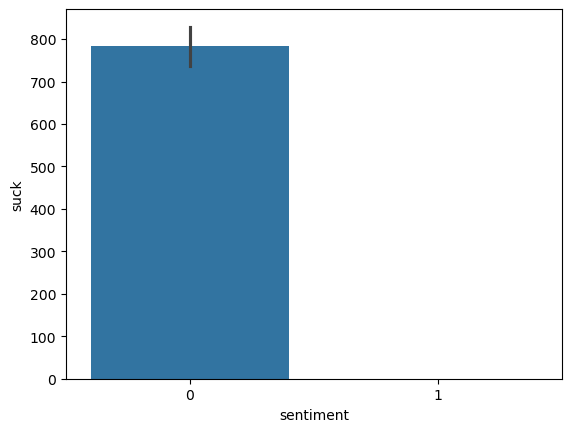

In [32]:
train_df_3['sentiment'] = data['sentiment']
sns.barplot(x='sentiment', y='suck', data=train_df_3, estimator='sum')
plt.show()

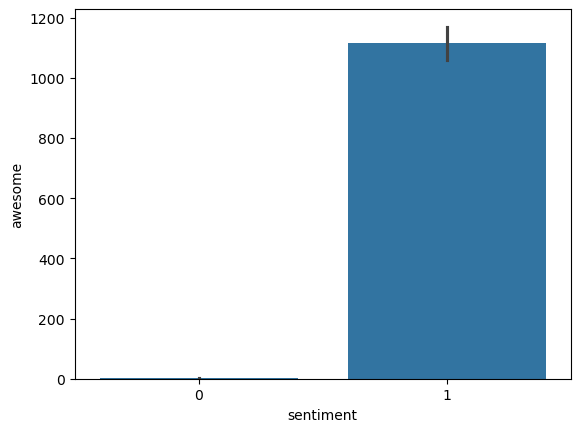

In [34]:
train_df_3['sentiment'] = data['sentiment']
sns.barplot(x='sentiment', y='awesome', data=train_df_3, estimator='sum')
plt.show()

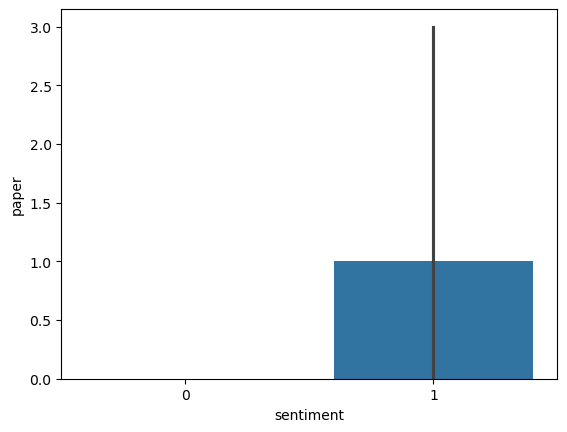

In [35]:
train_df_3['sentiment'] = data['sentiment']
sns.barplot(x='sentiment', y='paper', data=train_df_3, estimator='sum')
plt.show()

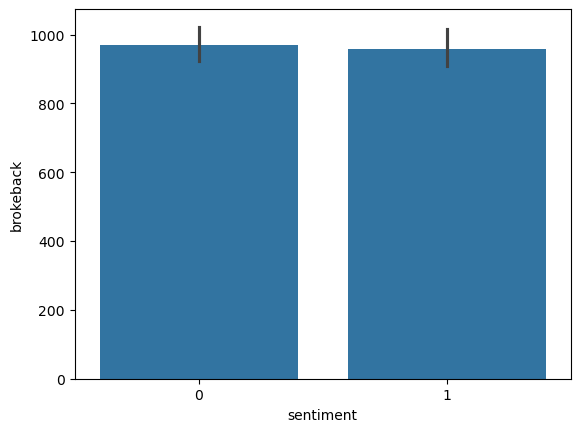

In [36]:
train_df_3['sentiment'] = data['sentiment']
sns.barplot(x='sentiment', y='brokeback', data=train_df_3, estimator='sum')
plt.show()

## Naive Bayes Model

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df_features, data.sentiment, random_state=43)

In [41]:
from sklearn.naive_bayes import BernoulliNB

bernauli = BernoulliNB()
bernauli.fit(x_train, y_train)

BernoulliNB()

In [42]:
y_pred = bernauli.predict(x_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       756
           1       0.98      0.99      0.99       974

    accuracy                           0.98      1730
   macro avg       0.98      0.98      0.98      1730
weighted avg       0.98      0.98      0.98      1730



<Axes: >

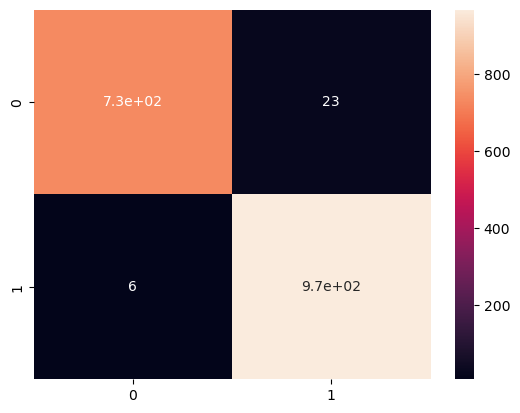

In [48]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

### Tf - IDF Vectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=stem_words, max_features=1000)
feature_vectors = tfidf.fit(data['text'])
features = tfidf.get_feature_names_out()
print("Feature (vacabulary)len", len(features))

train_df_features = tfidf.transform(data['text'])
train_df_features ## Stores in the sparse metrics - Sparse matric means

feature_counts = np.sum(train_df_features.toarray(), axis=0)

feature__count_df = pd.DataFrame(dict(features=features, counts=feature_counts))

feature__count_df.sort_values('counts', ascending=False)

Feature (vacabulary)len 1000


,features,counts
397,love,741.416786
37,awesome,619.776924
428,mountain,610.436765
68,brokeback,610.436765
741,suck,473.624398
...,...,...
452,obnoxious,0.098849
489,overlooking,0.098849
541,plastic,0.098849
461,office,0.098849


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df_features, data.sentiment, random_state=43)

In [57]:
from sklearn.naive_bayes import BernoulliNB

bernauli = BernoulliNB()
bernauli.fit(x_train, y_train)

BernoulliNB()

In [58]:
y_pred = bernauli.predict(x_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       756
           1       0.98      0.99      0.99       974

    accuracy                           0.98      1730
   macro avg       0.98      0.98      0.98      1730
weighted avg       0.98      0.98      0.98      1730



<Axes: >

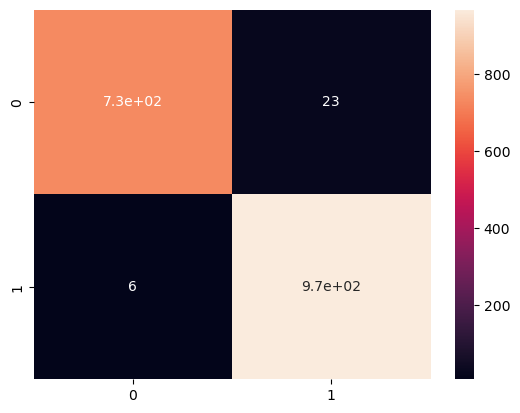

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)